## Plotting Data from CSV file:
### ENGR/Physics COCC
#### Bruce Emerson 4/13/21

An application came up where we have a data set to plot from the text. I have created a .csv file of the data and this notebook explores plotting and fitting a smooth curve to that data.

There are print statements at the end of most code cells that I use to check that I am pulling the data out of the .csv file as I intended. Other users might well wish to uncomment those print statements until they are sure the data is being read as intended.

### Dependencies

The new dependency here is the [Pandas](https://pandas.pydata.org/) library which was developed to support data science applications in python. It is classically imported with the alias pd. It is installed as part of your Anaconda package. When you update Anaconda you can also update Pandas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mplot
import matplotlib.pyplot as plt
from numpy.polynomial import polynomial as ply

### Read csv from Pandas

As we get deeper into python we will need to begin to develop a richer understanding of how python works. We can do this incrementally so don't panic. In Pandas there are a variety of [data structures](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe) which are described in the pandas documentation. There is clearly a lot to learn be we will focus on [data frames](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe) which are a data structure that matches our normal understanding of a two dimensional data set.

Notice that this data set (daily covid data for Oregon from [The COVID Tracking Project](https://covidtracking.com/data/download). In the printout of the data set the dots represent additional data not explicitly displayed but it's there.

## Download the data!!

Go to the link above and down load the data for Oregon and save it. I created a data folder to hold this and other data files. The format in the read statement below tells the pd.read_csv function to look in the data folder for a csv file called OregonDailydata.csv. The data is on my git repo but it's not easy to download just that file. Easier for you to go download it.

In [2]:
dataRaw = pd.read_csv('data/HW2Dataset.csv', sep=',')
print(dataRaw)

      Load          delta
0       kN             mm
1        0              0
2    17.32           0.02
3    60.62           0.07
4   112.58           0.13
5   147.22           0.17
6   161.18           0.53
7   168.27            1.1
8   176.03           1.96
9    182.8           2.79
10  190.75              4
11  193.29           4.71
12  200.01            5.8
13  204.65           7.15
14  209.99           8.88
15  212.06           9.99
16  212.17          11.01
17  208.64          11.63
18  204.99          12.03
19  199.34          12.31
20  192.15          12.47
21  185.46          12.63
22   break            NaN
23    Area  InitialLength
24    Mm^2             mm
25     144             50


### Manually Sort Data

Depending on the way the data has been entered into the .csv file you will probably need to manuually sort the file into actual data and other information. `pd.read_csv` returns the information as columns labeled with entry at top of list. 

`dataRaw['(label column 1)']` is a list of all the .csv entries after the first row.

I am manually pulling off the column labels from the dump of the data above. I am also pulling off the row number of the first and last row of data I want to work with. Other relevant data from the .csv file is included.

In [3]:
labelCol1 = 'Load'
labelCol2 = 'delta'
# additional column labels as needed

# define numerical data
numDataInitial = 1
numDataFinal = 21
numDataPts = numDataFinal - numDataInitial + 1 # +1 to correct for way data is counted.
print("Check that number of actual data points is ", numDataPts)
dataX = np.full(numDataPts,0.) # create data array of correct number of entries
dataY = np.full(numDataPts,0.)
# print(dataX, dataY)

# other relevant features from data dump
area = 144.0E-6 # area in m^2, needed to determine normal stress
gaugeLength = 50. # initial length in mm
unitStrain = 'mm/mm' # units in which strain will be calculated
unitLoad = 'kN' # units of load

Check that number of actual data points is  21


### Separate Columns:

I could work directly the dataRaw frame but I don't have the experience to do that yet so I am going to do the brute force approach of pulling the individual columns of data out of the pandas data frame. Very inefficient of me as a data scientist but who's watching.

In [4]:
dataCol1 = dataRaw[labelCol1]
dataCol2 = dataRaw[labelCol2]
# print(dataCol1, dataCol2)

### Pull the data points out of the column

The data points I want represent a subset of all the stuff in each column so this next cell is a way to pull the data points out of the column based on my previous manual identification of which are the data points.

In [5]:
dataPt = 0
while dataPt in range(0,numDataPts):
    dataX[dataPt] = dataCol2[dataPt+numDataInitial]
    dataY[dataPt] = dataCol1[dataPt+numDataInitial]
    dataPt = dataPt+1
    
# print(dataX, dataY)

### Recasting Data if Needed:

In many cases the raw data will be recast into some slightly different form. The data may represent a force and I want the pressure. The data may be a length and I want the proportional stretch. This cell makes those adjustment. In the original form of this notebook I am given the axial load in a tensile test and I want the stress which is load/area. I am also given the stretch and I want the strain which is the stretch/(initial length). So... a little quick processing.

In [6]:
dataPt = 0
while dataPt in range(0,numDataPts):
    dataX[dataPt] = dataX[dataPt]/gaugeLength
    dataY[dataPt] = (dataY[dataPt]/area)*1.0E-6 # to convert to GPa for the stress
    dataPt = dataPt+1
    
print(dataX, dataY)

[0.     0.0004 0.0014 0.0026 0.0034 0.0106 0.022  0.0392 0.0558 0.08
 0.0942 0.116  0.143  0.1776 0.1998 0.2202 0.2326 0.2406 0.2462 0.2494
 0.2526] [0.         0.12027778 0.42097222 0.78180556 1.02236111 1.11930556
 1.16854167 1.22243056 1.26944444 1.32465278 1.34229167 1.38895833
 1.42118056 1.45826389 1.47263889 1.47340278 1.44888889 1.42354167
 1.38430556 1.334375   1.28791667]


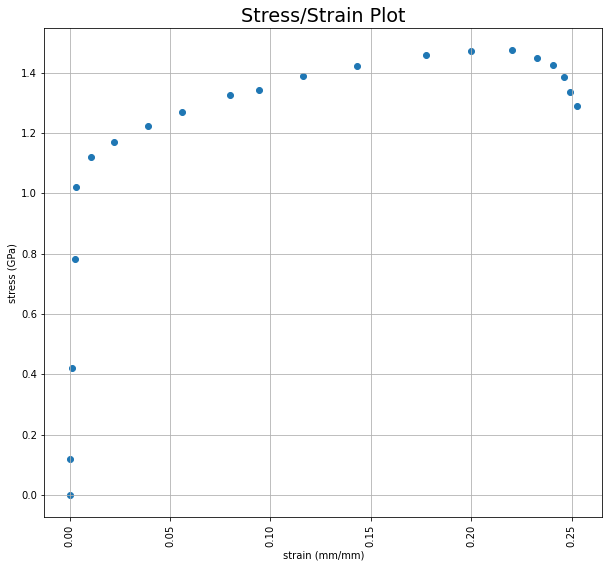

In [7]:
# First Plot
fig1, ax1 = plt.subplots()
ax1.scatter(dataX, dataY)

plt.rcParams.update({'font.size': 16}) # make labels easier to read
plt.xticks(rotation='vertical')
ax1.set(xlabel='strain (mm/mm)', ylabel='stress (GPa)',
       title='Stress/Strain Plot')

fig1.set_size_inches(10, 9)
ax1.grid()

#fig1.savefig("myplot.png")
plt.show()

### Plot Details:

I often want to look at some aspect of my plot more carefully so if I use `plt.xlim(min,max)` and `plt.ylim(min,max)` I can zoom in on some aspect of the plot of interest to me.

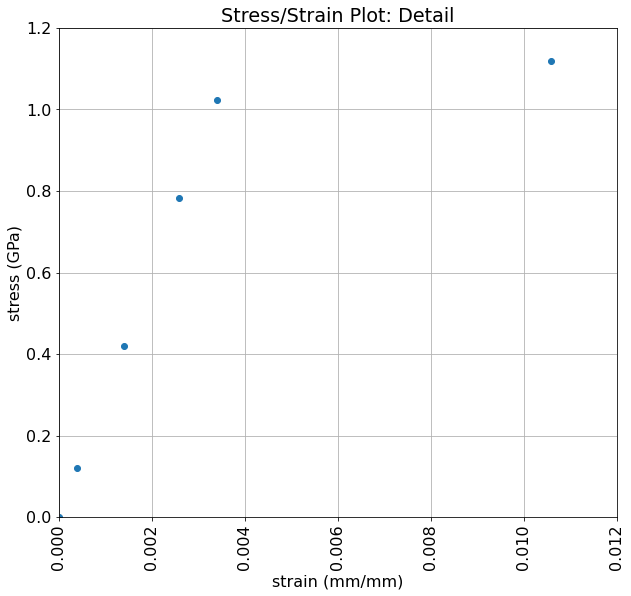

In [60]:
# Detail Plot
fig2, ax2 = plt.subplots()
ax2.scatter(dataX, dataY)

plt.rcParams.update({'font.size': 16}) # make labels easier to read
plt.xticks(rotation='vertical')
ax2.set(xlabel='strain (mm/mm)', ylabel='stress (GPa)',
       title='Stress/Strain Plot: Detail')

# controlling x and y limits on plot show a detail
plt.xlim([0, 0.012])
plt.ylim([0, 1.2])

fig2.set_size_inches(10, 9)
ax2.grid()

#fig1.savefig("myplot.png")
plt.show()

### Drop a Line on the Plot:

Set up range of x values using 'np.linspace()' and then plot the line over the data. Adjust fit parameters as needed. In this case I also dropped another line that is offset in the x direction and parallel to the first.

In [65]:
# range of x values -- choose lower and upper limits of range
propRegionX = np.linspace(0.,0.004,20)

# actual model parameters - slope and intercept
propIntercept = 0.
propSlope = 300.

# generate y values from model 
propRegionY = propIntercept + propSlope*propRegionX

#print(propRegionX)
print(propRegionY)

[0.         0.06315789 0.12631579 0.18947368 0.25263158 0.31578947
 0.37894737 0.44210526 0.50526316 0.56842105 0.63157895 0.69473684
 0.75789474 0.82105263 0.88421053 0.94736842 1.01052632 1.07368421
 1.13684211 1.2       ]


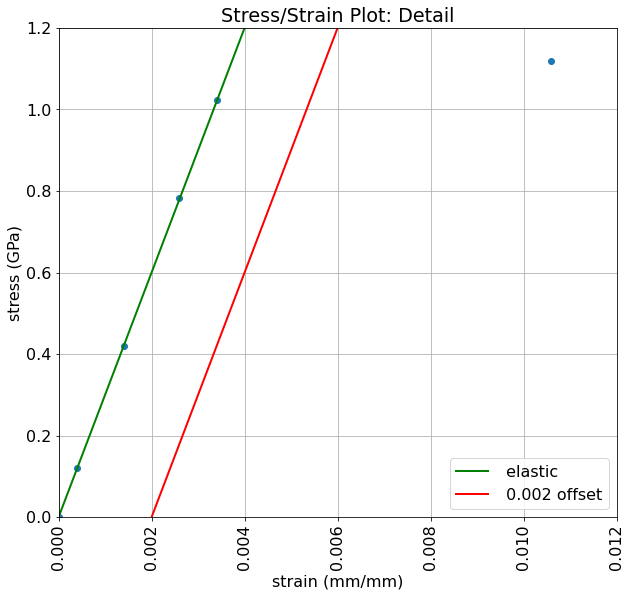

In [64]:
# Detail Plot
fig3, ax3 = plt.subplots()
ax3.scatter(dataX, dataY)
ax3.plot(propRegionX, propRegionY, color = 'green', linestyle = '-', linewidth = 2., label = " elastic")
ax3.plot(propRegionX+.002, propRegionY, color = 'red', linestyle = '-', linewidth = 2., label = " 0.002 offset")

plt.rcParams.update({'font.size': 16}) # make labels easier to read
plt.xticks(rotation='vertical')
ax3.set(xlabel='strain (mm/mm)', ylabel='stress (GPa)',
       title='Stress/Strain Plot: Detail')

# controlling x and y limits on plot show a detail
plt.xlim([0, 0.012])
plt.ylim([0, 1.2])

fig3.set_size_inches(10, 9)
ax3.grid()
plt.legend(loc= 4)

#fig3.savefig("myplot.png")
plt.show()

### Polynomial Fit:

Same process we used for the RockDrop lab in physics. Find the coefficients of the polynomial of whatever degree requested.

In [123]:
degree = 4
coefs1 = ply.polyfit(dataX[0:6], dataY[0:6],degree)
coefs2 = ply.polyfit(dataX[5:16], dataY[5:16],degree)
coefs3 = ply.polyfit(dataX[15:20], dataY[15:20],degree)
print("Coefficients of polynomial fit (1):", coefs1)
print("Coefficients of polynomial fit (2):", coefs2)
print("Coefficients of polynomial fit (3):", coefs3)

Coefficients of polynomial fit (1): [-2.03545836e-04  3.03802325e+02 -4.90161800e+03  2.34542270e+06
 -3.44044735e+08]
Coefficients of polynomial fit (2): [   1.07161494    4.94784632  -32.55472192  146.29286202 -285.51677846]
Coefficients of polynomial fit (3): [   -3297.17297005    56681.89614002  -365122.06716614  1045021.41134665
 -1121359.34416064]


### Plotting Superposition:

I needed to play with the ranges of the plotted polynomial fits to keep things from getting crazy in the plots. 

In [124]:
# generate x values for curve fit
numpoints = 20
polyX1 = np.linspace(dataX[0],dataX[4],numpoints)
polyX2 = np.linspace(dataX[5],dataX[16],numpoints)
polyX3 = np.linspace(dataX[16],dataX[20],numpoints)

# create a model height list that matches the model time
polyY1 = np.full_like(polyX1,0)
polyY2 = np.full_like(polyX2,0)
polyY3 = np.full_like(polyX3,0)

# calculate the heights predicted from the model
polyY1 = coefs1[0] + coefs1[1]*polyX1 + \
        coefs1[2]*polyX1**2 + coefs1[3]*polyX1**3  + \
        coefs1[4]*polyX1**4# + coefs1[5]*polyX1**5 + \
#        coefs1[6]*polyX1**6 + coefs1[7]*polyX1**7

polyY2 = coefs2[0] + coefs2[1]*polyX2 + \
        coefs2[2]*polyX2**2 + coefs2[3]*polyX2**3  + \
        coefs2[4]*polyX2**4# + coefs2[5]*polyX2**5# + \
#        coefs2[6]*polyX2**6 + coefs2[7]*polyX2**7

polyY3 = coefs3[0] + coefs3[1]*polyX3 + \
        coefs3[2]*polyX3**2 + coefs3[3]*polyX3**3  + \
        coefs3[4]*polyX3**4# + coefs3[5]*polyX3**5 + \
#        coefs3[6]*polyX3**6 + coefs3[7]*polyX3**7

print("testing the output of the loop;", polyY1)

testing the output of the loop; [-2.03545836e-04  5.40172075e-02  1.07999741e-01  1.61811993e-01
  2.15513436e-01  2.69155075e-01  3.22779449e-01  3.76420629e-01
  4.30104219e-01  4.83847357e-01  5.37658713e-01  5.91538491e-01
  6.45478427e-01  6.99461790e-01  7.53463384e-01  8.07449544e-01
  8.61378138e-01  9.15198569e-01  9.68851772e-01  1.02227021e+00]


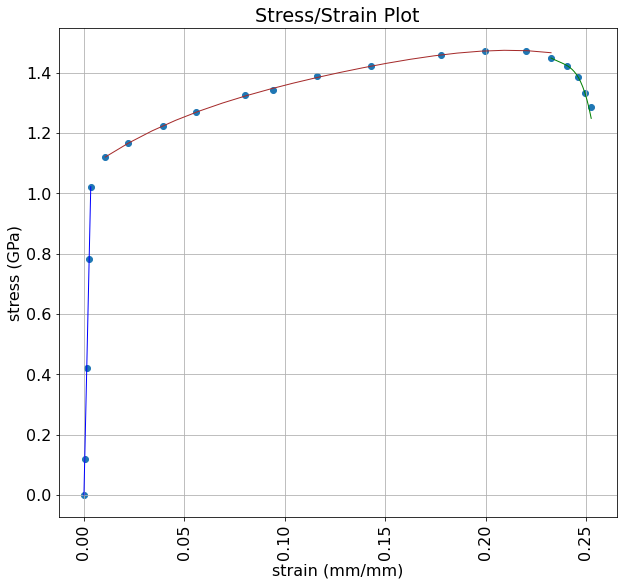

In [125]:
# First Plot
fig4, ax4 = plt.subplots()
ax4.scatter(dataX, dataY)
ax4.plot(polyX1, polyY1, color = 'blue', linestyle = '-', linewidth = 1., label = "polynomial fit")
ax4.plot(polyX2, polyY2, color = 'brown', linestyle = '-', linewidth = 1., label = "polynomial fit")
ax4.plot(polyX3, polyY3, color = 'green', linestyle = '-', linewidth = 1., label = "polynomial fit")

plt.rcParams.update({'font.size': 16}) # make labels easier to read
plt.xticks(rotation='vertical')
ax4.set(xlabel='strain (mm/mm)', ylabel='stress (GPa)',
       title='Stress/Strain Plot')

fig4.set_size_inches(10, 9)
ax4.grid()

#fig1.savefig("myplot.png")
plt.show()